In [22]:
import numpy as np
import MDAnalysis as mda
import sys
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def exponential_func(x, A, B):
    return (A * np.exp(-(x-1) /B)) 


from scipy.special import legendre
l2 = legendre(2)
l1 = legendre(1)

from pathlib import Path
base = Path("/home/boittier/pcbach/waterlj/kparms-4.0-d594b332-5427-4d8a-9b79-64f1ac10ed1a")
psfpath = base / "water.psf"
dcdpath = base / "dcd/water.2000.280.0.dyna2.2.dcd"
u = mda.Universe(psfpath, dcdpath)

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [35]:
list(u.atoms[:3])

[<Atom 1: H of type HT of resname TIP3, resid 1 and segid TIP3>,
 <Atom 2: O of type OT of resname TIP3, resid 1 and segid TIP3>,
 <Atom 3: H1 of type HT of resname TIP3, resid 1 and segid TIP3>]

In [47]:
from MDAnalysis.analysis import rdf
water_rdf_1 = """2.4615076480275357 0.059468174017968334
2.512692313398513 0.3882072509136556
2.5574974407667312 1.423799138515099
2.5603163063958574 1.1114688268079047
2.589246769431628 1.9059735224445984
2.602945467313522 2.388157797130691
2.6548719394290066 2.6347046867350117
2.6890939572422585 2.8429051130266214
2.7816714389567228 2.5853201390640375
2.801551859709508 2.3825695196554055
2.8774634165640496 1.9715690201721972
2.9164824513251135 1.6482599686463002
2.992047831698885 1.2756158232323962
3.1762631732514377 0.8645559792096273
3.4116631801749673 0.7822352120825458
3.717534827826654 0.8916566522756137
4.0769154686487745 1.072281649184752
4.563787961960149 1.1268093902843077
5.197439283117961 0.9182430059987414
5.504695636692729 0.874239029914591
6.099575192004312 0.9615843013911327
6.658353485749892 1.0489493543808615
7.2905706472016565 0.9992878655252708
7.88648873195555 0.971564074793899
8.698618755841729 0.9875574282054682
9.330341379463821 0.992690730877456
10.449431034226963 0.9975569831214215
11.31596021937698 0.9861232684994214
"""

water_rdf_2 = """2.412776412776413 0.03828650785172538
2.515970515970516 0.438436064523021
2.5454545454545454 1.142826621087491
2.633906633906634 1.9951287255635082
2.751842751842752 2.482256169212691
2.86977886977887 2.065035786774917
2.9729729729729732 1.4999679521418652
3.194103194103194 0.9437666915927785
3.385749385749386 0.8483922657835701
3.8574938574938575 0.9882063882063881
4.211302211302211 1.0582843713278498
4.535626535626536 1.0500587544065805
4.88943488943489 1.0157889114410854
5.213759213759214 0.9988676423459031
5.523341523341523 0.9471423993163122
5.803439803439803 0.9388526866787736
6.083538083538084 0.9653455827368871
6.378378378378379 1.0179468005554961
6.658476658476658 1.0444396966136096
6.968058968058967 1.036192714453584
7.616707616707616 1.0110458284371329
8.132678132678132 1.0030979596196985
8.737100737100738 1.0039739344087169
9.533169533169533 0.9964320051276572
9.93120393120393 1.01440017092191
"""


def plot_rdf_exp(ax, shift=0, c="k", lw=0.5, linestyle="--", marker="o"):
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_1.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        "-",
        fillstyle="none",
        marker=marker,
        c=c,
        alpha=0.5,
        label="[Hura, 2003]",
        linewidth=lw,
    )
    # exp. data
    ex = []
    ey = []
    for _ in water_rdf_2.split("\n"):
        if _:
            ex.append(float(_.split(" ")[0]))
            ey.append(float(_.split(" ")[1]) + shift)

    ax.plot(
        ex,
        ey,
        linestyle,
        fillstyle="none",
        c=c,
        alpha=0.5,
        marker=marker,
        label="[Soper, 2007]",
        linewidth=lw,
    )
    return ax

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Text(0.5, 0, '$r~[\\mathrm{Å}]$')

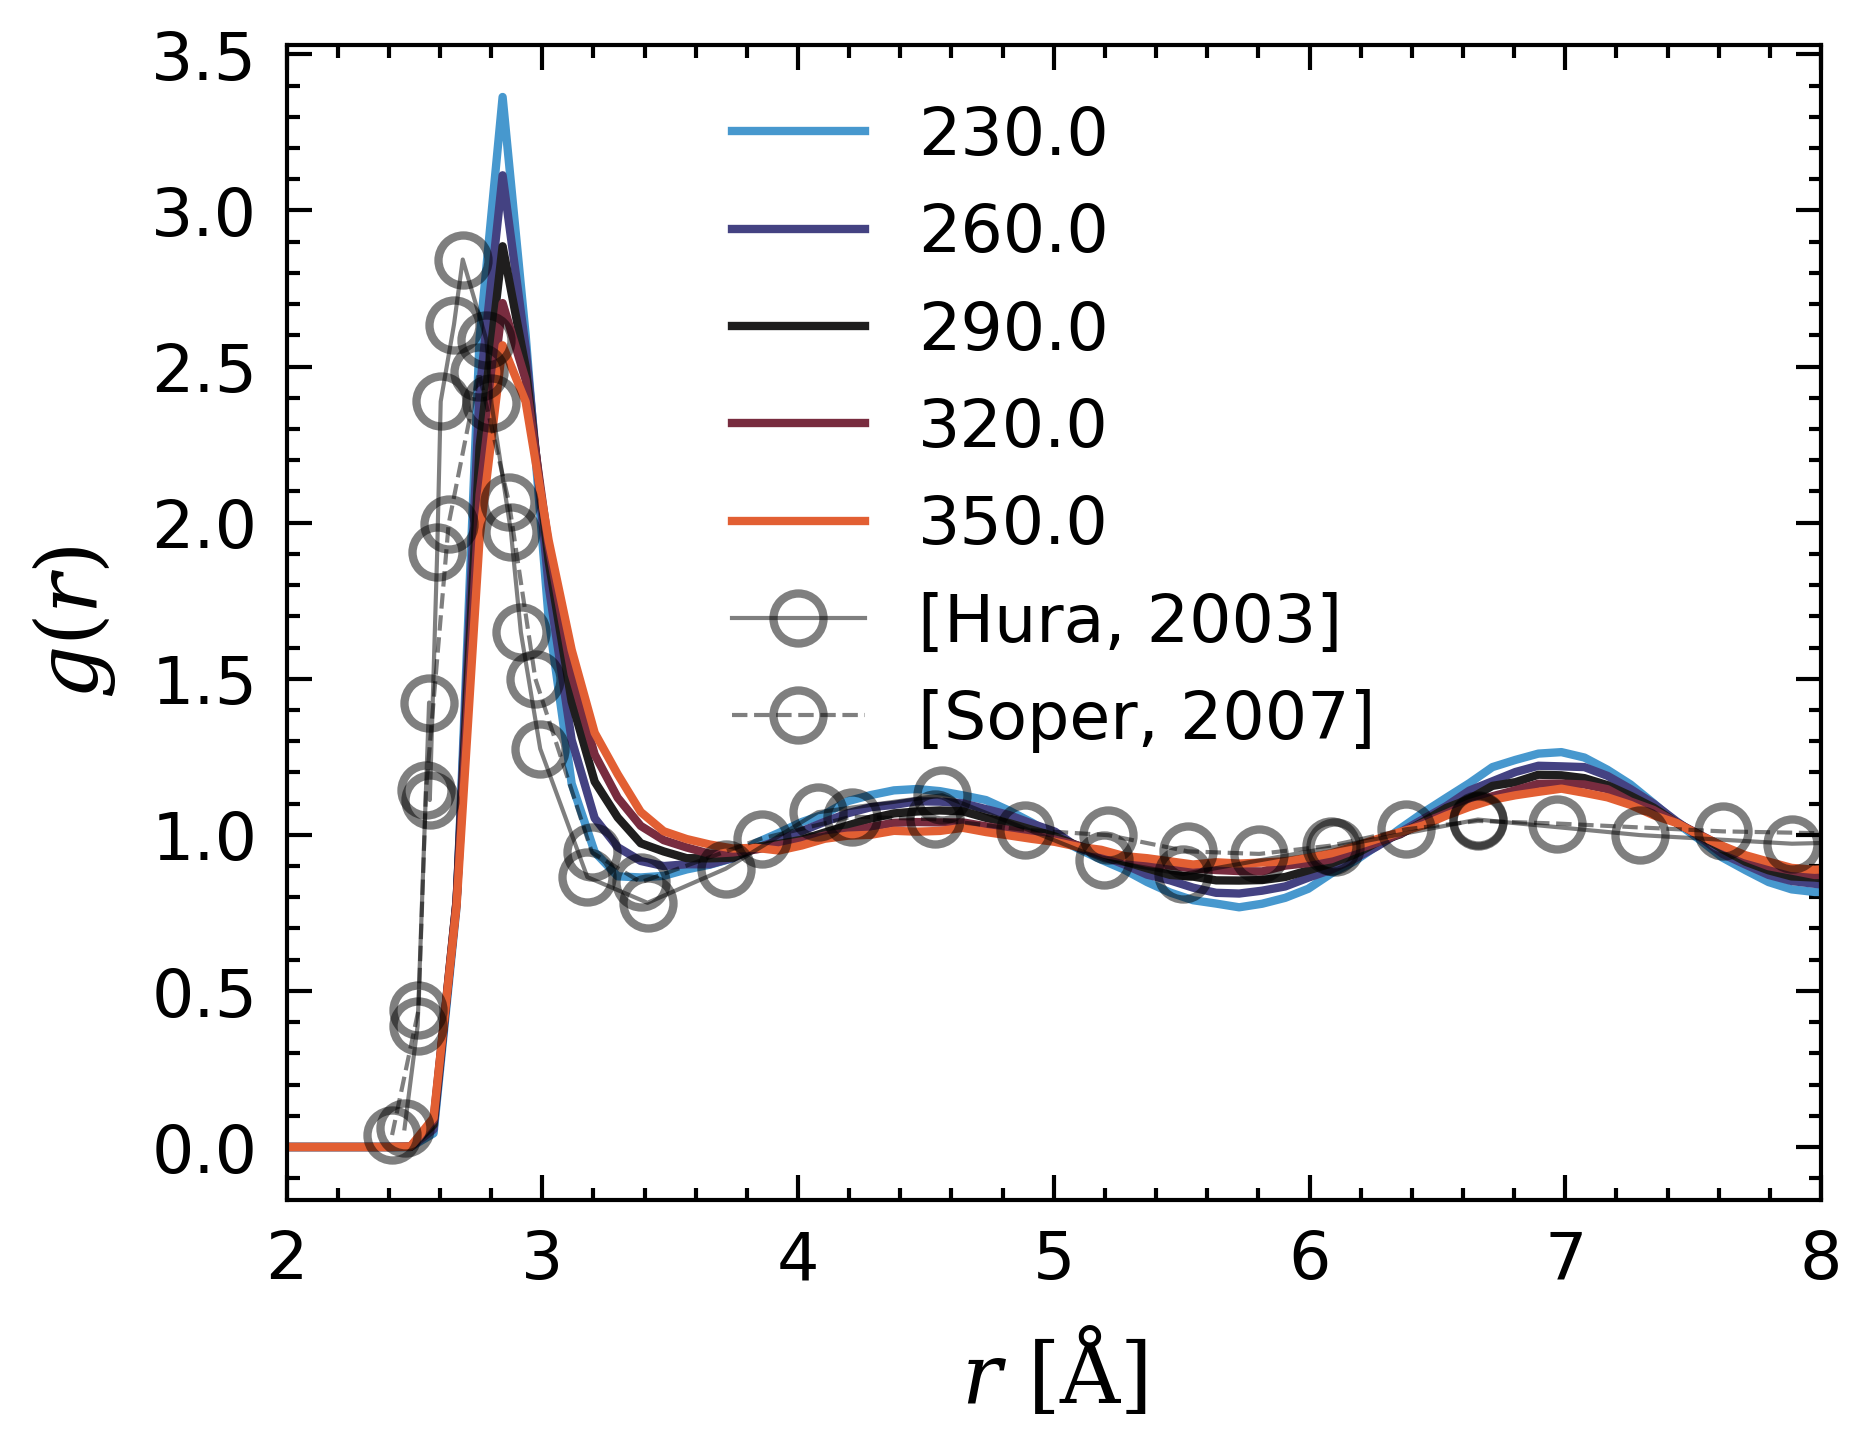

In [144]:
temperatures = np.arange(230.0, 380.0, 10.0)
import seaborn as sns
from ff_energy.simulations import charmm, plots

#  matplotlib styles
plt.style.use(["science", "no-latex", "ieee"])

# ureg = pint.UnitRegistry()
# colors = sns.cubehelix_palette(start=.5, rot=-.5)
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i in temperatures[::3]:
    dcdpath = base / f"dcd/water.2000.{i}.dyna2.2.dcd"
    u = mda.Universe(psfpath, dcdpath)
    rdf = mda.analysis.rdf.InterRDF(u.select_atoms("type OT"), 
                                    u.select_atoms("type OT"),
                                    nbins=100, range=(1,10), verbose=True)
    rdf.run()
    plt.plot(rdf.bins, rdf.rdf, "-", label=i, color=colors[c])
    c += 1
    
ax = plt.gca()
plot_rdf_exp(ax, shift=0, c="k", lw=0.5, 
             linestyle="--", marker="o")
plt.xlim(2,8)
plt.legend()
ax.set_ylabel("$g(r)$", fontsize=FONTSIZE)
ax.set_xlabel("$r~[\mathrm{Å}]$", fontsize=FONTSIZE)

In [61]:
colors

[(0.27923924, 0.59522877, 0.80669803),
 (0.2659204, 0.25949691, 0.511417),
 (0.12284806, 0.1179729, 0.11772022),
 (0.47151732, 0.17401641, 0.24610337),
 (0.8866469, 0.37249496, 0.1997976)]

In [52]:
# rdf = mda.analysis.rdf.InterRDF(u, [[u.select_atoms("name OH2"), u.select_atoms("name OH2")]])

In [146]:
subprocess.run(["pwd"]) 

/home/boittier/Documents/phd/water-knn/notebooks/oto/test


CompletedProcess(args=['pwd'], returncode=0)

In [147]:
# os.chdir("water-knn/notebooks/")
os.chdir("../..")

In [148]:
c = 0
for i in temperatures[::]:
    dcdpath = base / f"dcd/water.2000.{i}.dyna2.2.dcd"
    u = mda.Universe(psfpath, dcdpath)
    # os.chdir("../")
    for ii, ts in enumerate(u.trajectory[::10]):
        with XYZWriter(f'oto/test/{i}oto{ii}.xyz', remark="{} {} {}".format(*ts.dimensions[:3])) as w:
            atoms = u.select_atoms("type OT")
            print(atoms)
            w.write(atoms)

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


<AtomGroup [<Atom 2: O of type OT of resname TIP3, resid 1 and segid TIP3>, <Atom 5: O of type OT of resname TIP3, resid 2 and segid TIP3>, <Atom 8: O of type OT of resname TIP3, resid 3 and segid TIP3>, ..., <Atom 5993: O of type OT of resname TIP3, resid 1998 and segid TIP3>, <Atom 5996: O of type OT of resname TIP3, resid 1999 and segid TIP3>, <Atom 5999: O of type OT of resname TIP3, resid 2000 and segid TIP3>]>
<AtomGroup [<Atom 2: O of type OT of resname TIP3, resid 1 and segid TIP3>, <Atom 5: O of type OT of resname TIP3, resid 2 and segid TIP3>, <Atom 8: O of type OT of resname TIP3, resid 3 and segid TIP3>, ..., <Atom 5993: O of type OT of resname TIP3, resid 1998 and segid TIP3>, <Atom 5996: O of type OT of resname TIP3, resid 1999 and segid TIP3>, <Atom 5999: O of type OT of resname TIP3, resid 2000 and segid TIP3>]>
<AtomGroup [<Atom 2: O of type OT of resname TIP3, resid 1 and segid TIP3>, <Atom 5: O of type OT of resname TIP3, resid 2 and segid TIP3>, <Atom 8: O of type O

In [149]:
import subprocess

subprocess.run(["ls", "-l"]) 

total 1740
-rw-rw-r-- 1 boittier boittier  18406 Nov  9 21:01 dGwater.pdf
-rw-rw-r-- 1 boittier boittier 166882 Nov  9 21:02 hydration_free_energy.ipynb
-rw-rw-r-- 1 boittier boittier 696826 Nov  8 19:00 IR-sensitivity.ipynb
drwxrwxr-x 4 boittier boittier   4096 Nov  9 23:20 oto
-rw-rw-r-- 1 boittier boittier 887491 Nov 10 00:26 Untitled.ipynb


CompletedProcess(args=['ls', '-l'], returncode=0)

In [150]:
os.chdir("oto/test")

In [151]:
for i in temperatures[::]:
    files = Path(".").glob(f"{i}*xyz")
    for file in files:
        print("file")
        subprocess.run(["order",file, "-t", "oto"])
        # subprocess.run(["ls", "-l"]) 


file
                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	230.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.94 seconds.

    

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	230.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.84 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	230.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.86 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	230.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.12 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	230.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.05 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	230.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.83 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	240.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.44 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	240.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.10 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	240.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.77 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	250.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.93 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	250.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.05 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	250.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.80 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	250.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.92 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	250.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.94 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.88 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.84 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.60 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.83 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.05 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.36 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	260.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.88 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	270.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.73 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	270.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.00 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	270.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.34 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	270.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.52 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	270.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.68 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	270.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.06 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.38 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto7.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.84 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.75 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.79 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.88 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.37 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	280.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.91 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.68 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.78 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto7.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.93 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.09 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.87 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.02 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.02 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	290.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.71 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	300.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.90 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	300.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.28 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	300.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.11 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	300.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.18 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	300.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.17 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto8.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.98 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.03 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.89 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.00 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto9.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.03 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.94 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.87 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	310.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.85 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.73 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto7.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.92 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto10.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.75 seconds.

        

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.96 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.00 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.98 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.09 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto9.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.19 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	320.0oto8.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.85 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto9.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.92 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.84 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


file
                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.96 seconds.

    

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


file


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.24 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto7.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.81 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto8.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.95 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.90 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	330.0oto6.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.08 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	340.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.23 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	340.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.84 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	340.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.89 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	340.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.94 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	340.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.07 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	350.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.09 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	350.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.81 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	350.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.99 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	350.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.83 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	350.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.90 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	360.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.19 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	360.0oto2.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.87 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	360.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.69 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	360.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.93 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	360.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.87 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	370.0oto3.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.87 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	370.0oto1.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.88 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	370.0oto0.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.29 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	370.0oto5.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 8.17 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


                
                ,-----.           ,--.               
                '  .-.  ',--.--. ,-|  | ,---. ,--.--. 
                |  | |  ||  .--'' .-. || .-. :|  .--' 
                '  '-'  '|  |   \ `-' |\   --.|  |    
                `-----' `--'    `---'  `----'`--'    
                                                    
    
----------------------------------------------------------------------

Order: A tool to characterize the local structure of liquid water
       by geometric order parameters

System information:

        XYZ trajectory file name:	370.0oto4.xyz
  Number of particles in the box:	2000
       Total number of snapshots:	1


Task information:

                  Parameter name:	Oritentational tetrahedral order
                       Frequency:	every 1 frame(s)
                  Number of bins:	100
                     Center atom:	O


----------------------------------------------------------------------

Total elapsed time = 7.97 seconds.

         

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


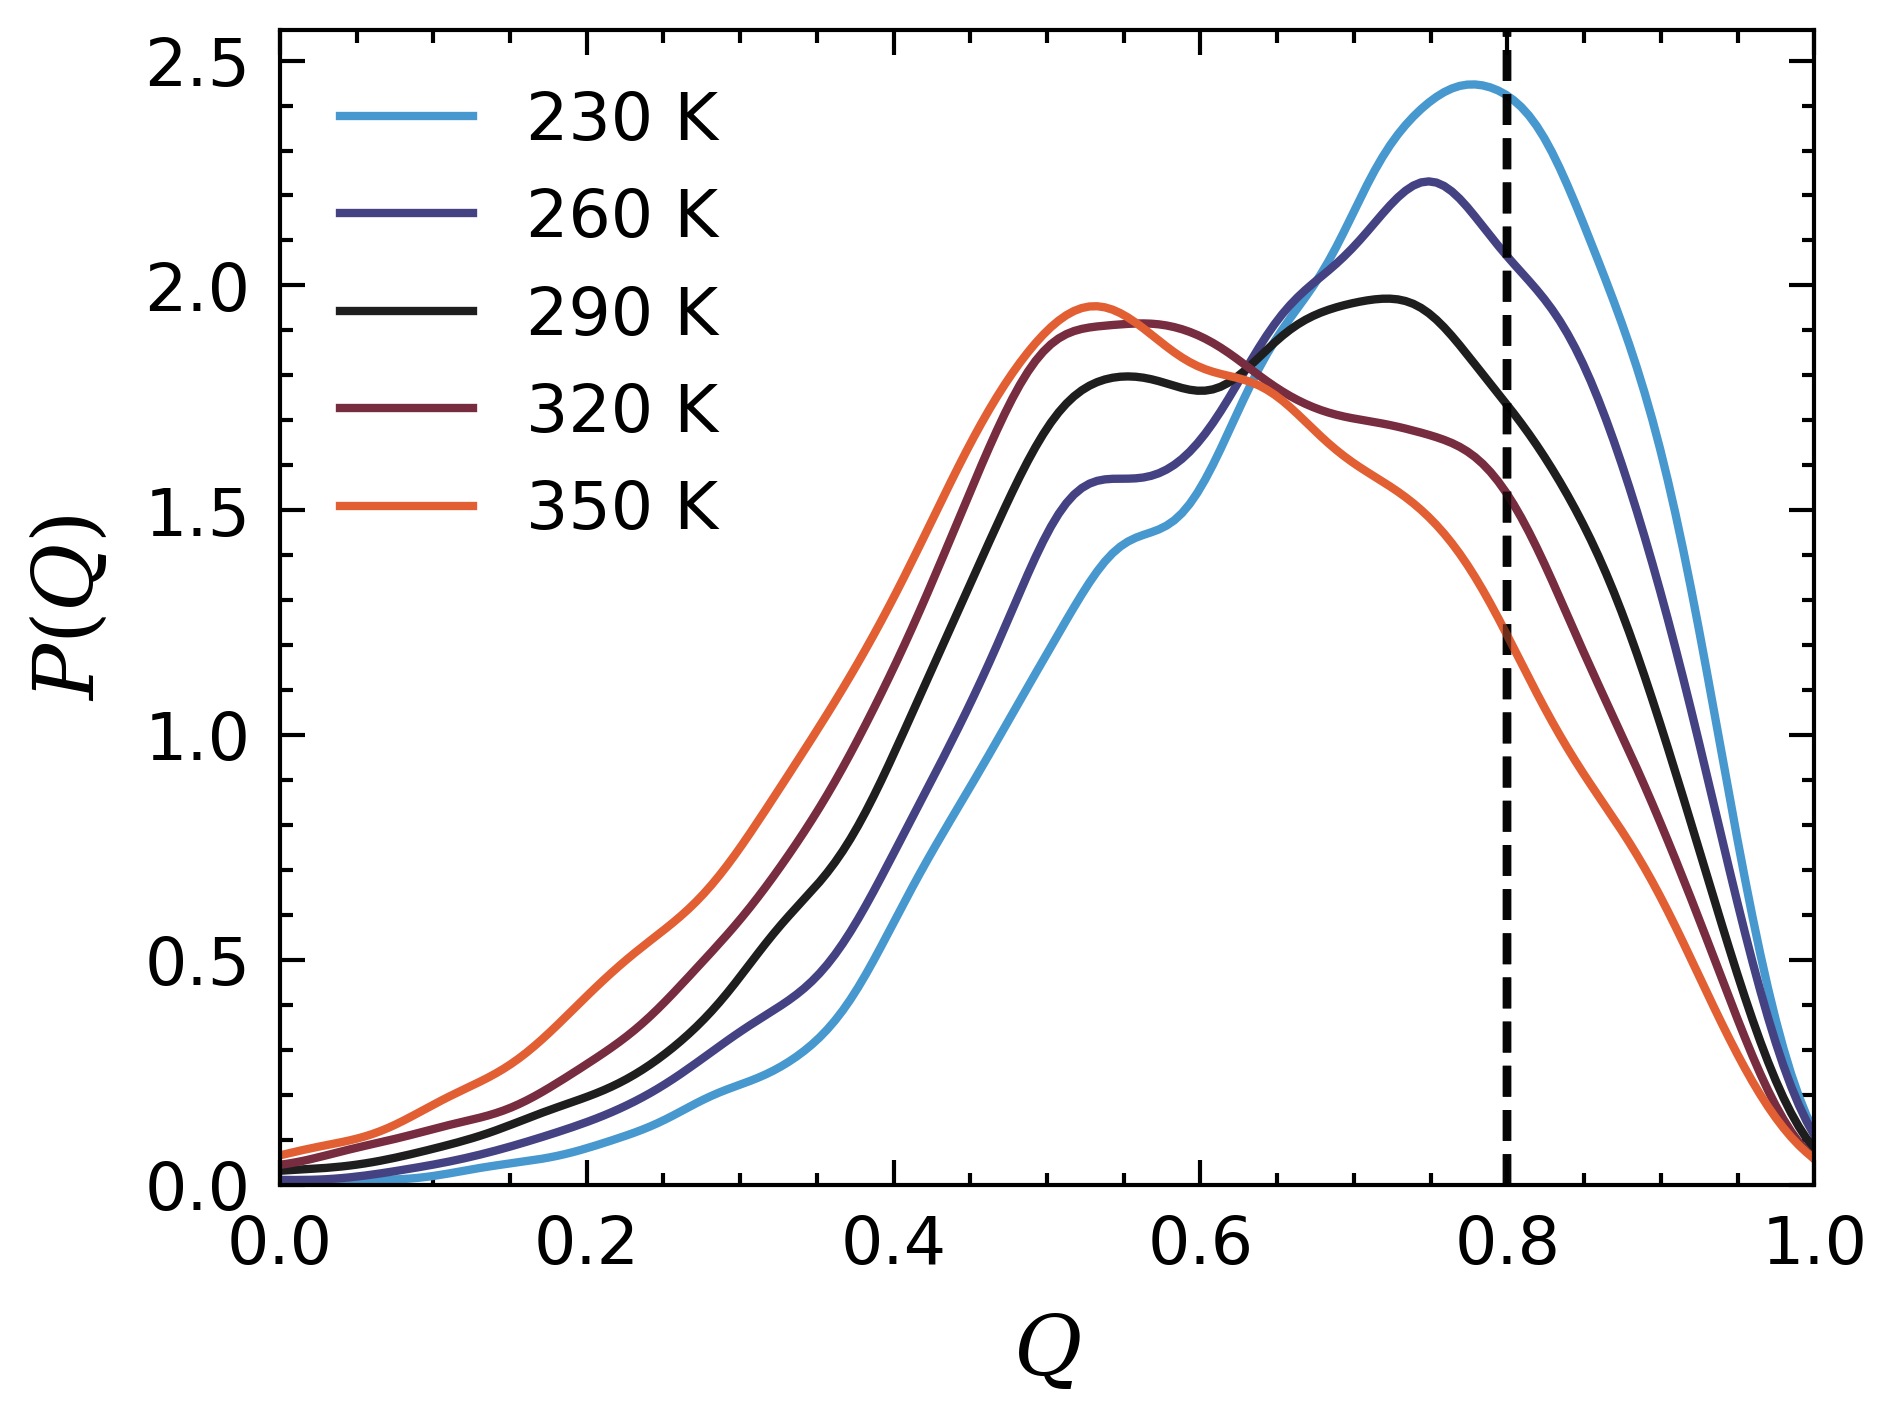

In [174]:
colors = sns.color_palette("icefire", len(temperatures[::3]))
c = 0
for i in temperatures[::3]:
    KMDCMoto = np.concatenate([np.loadtxt(_) for _ in list(Path(".").glob(f"{i}*raw.dat"))])
    FONTSIZE=10

    # plt.plot(data[1,0], np.mean(data[0,:], axis=0))
    # yErr = stats.sem(data[:,1], axis=0)
    # yErr = np.mean(data[:,1], axis=0)
    scale = 0.02
    # plt.errorbar(data[1,0], np.mean(data[:,1], axis=0)*scale, yerr=yErr*0, c="b")

    plt.xlabel("$Q$", fontsize=FONTSIZE)
    plt.ylabel("$P(Q)$", fontsize=FONTSIZE)

    ax = plt.gca()

    # sns.kdeplot(kmdcm,ax=ax, label="kMDCM-RKHS", 
    #             color="blue", clip= (-1.0, 1.0))
    # sns.kdeplot(shake, ax=ax, label="TIP3 (SHAKE)", color="orange",
    #             linestyle="-", clip= (0, 1.0))

    sns.kdeplot(KMDCMoto, ax=ax, label=f"{i:.0f} K", color=colors[c],
                linestyle="-", clip= (0, 1.0))
    # sns.kdeplot(SWM4oto, ax=ax, label="SWM4", color="r",
    #             linestyle="-", clip= (0, 1.0))
    # sns.kdeplot(SHAKEoto, ax=ax, label="TIP3 (SHAKE)", color="orange",
    #             linestyle="-", clip= (0, 1.0))

    ax.axvline(0.8, color="black", linestyle="--", alpha=0.51)
    c += 1
    plt.xlim(0, 1)
    # plt.legend()
# sns.kdeplot(SWM4oto, ax=ax, label="SWM4", color="gray",
#             linestyle="-", marker="o",clip= (0, 1.0), alpha=0.15)
# sns.kdeplot(SHAKEoto, ax=ax, label="TIP3", color="gray",
#             linestyle="-", marker="x", clip= (0, 1.0), alpha=0.15)

plt.legend()
plt.show()


In [154]:
oto_files = Path("/home/boittier/Documents/phd/ff_energy/notebooks/playground/oto")
oto_files2 = Path("/home/boittier/Documents/phd/ff_energy/notebooks/playground/oto2")

In [155]:
SWM4oto = np.concatenate([np.loadtxt(_) for _ in list(oto_files2.glob("*raw.dat"))])
SHAKEoto = np.concatenate([np.loadtxt(_) for _ in ["/home/boittier/Documents/phd/ff_energy/notebooks/playground/shake_comb_oto_raw.dat"]])